## Numerical Recipes Workshop 1

For the week of 27 September to 3 October, 2021

**Please submit your notebook via Noteable by the end of the class

**IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.

### Learning Objectives
- Refresh of Python basics and best practices
- Integer and floating point precision
- NumPy basics
- Plotting with matplotlib
    - basic plots
    - multi-panel plots
- Interpolation

Please complete the workshop notebook before beginning on the checkpoint. **The workshop notebooks demonstrate everything you need to complete the checkpoints.**

## Documentation

Below are links to documentation for the versions of modules on Noteable.

* Python: https://docs.python.org/3.7/
* NumPy: https://numpy.org/doc/1.19/
* SciPy: https://docs.scipy.org/doc/scipy/reference/
* matplotlib: https://matplotlib.org/3.2.2/index.html

Advice: google is really helpful (e.g. "numpy trapezoid rule")

## Python/package Versions

It's good to know what versions of Python and various packages you're using. Answers can be different or known bugs may exist in specific versions.

Use sys package for Python version. Most external packages have a `__version__` attribute associated with the top level import.

In [1]:
# Python version
import sys
print(sys.version)
# Scipy version
import scipy
print(scipy.__version__)
# Try numpy and matplotlib

3.9.2 | packaged by conda-forge | (default, Feb 21 2021, 05:02:46) 
[GCC 9.3.0]
1.7.0


## The two most useful functions in Python
* `dir` - list all names (variables, functions, etc) in the given scope, i.e., what's in here? Try the following:
```
# top level name space
dir()
x = 1
dir()
```
```
import sys
# contents of the sys module
dir(sys)
```

* `help` - show documentation for a function or object.
```
import numpy as np
help(np.sum)
```

### Use `dir` to see what's in the NumPy module. Pick a random function and see what it does.

### Challenge: create an array of values 0, 2, 4, ...18 with a shape of 2x5. Can you do it in a single line?
The resulting array should be:
```
array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])
```
Hint: check out the `arange` and `reshape` NumPy functions.

In [2]:
import numpy as np

## Best Practices

* Put module imports at the top in the first code cell.
* Rename modules to keep names short.
```
# Too long!
import numpy
x = numpy.arange(10)
```
```
# Much better
import numpy as np
x = np.arange(10)
```
* Avoid `from MODULE import *`. Every available object will be in your namespace.
```
from scipy import *
dir() # aaah!
```
* Be careful with variable names. Just about everything can be overwritten.
```
dir = 5
dir()
# The dir function is now lost. Doom.
```
* Use tab completion to recall function/object names. Start typing something and hit the [tab] key a couple times to bring up a menu of matching options. Use this in the terminal, too. Don't waste time typing long names.
```
np.su[tab][tab]
```
* **If things are getting messy,** restart the kernel using one of the *Restart* commands in the *Kernel* menu. This will reset your session, removing bad imports and extra variables.
* **Cell taking too long to run?** From *Kernel* menu, click *Interrupt* to stop execution. Have a look at the traceback to see where the code was. This can give a hint as to why it's taking so long.
* **Keep it neat.** Someone is most likely going to have to read your code someday. It should look nice, be clear, and conform to the style of code that was already there.
* **Your notebook should always run correctly without running cells more than once or out of order.** You can check this by clicking *Restart & Run All* from the *Kernel* menu.

### Plotting tips
* add `%matplotlib inline` your import cell to get plots to show up in the notebook
```
from matplotlib import pyplot as plt
%matplotlib inline
```
* add the following in a separate cell to make default plot and font sizes bigger
```
pyplot.rcParams['figure.figsize'] = (10, 6) # inches
pyplot.rcParams['font.size'] = 14
```

## More Best Practices: Organizing Your Code

It is a good idea to split up your code between multiple cells such that each cell represents a single, logical step, e.g., a cell for module imports, defining a function, making a plot. This can be very helpful for debugging and reusing code.

### Not great code organization

The cell below does every step of the computation. If there are bugs anywhere in the cell, the whole cell won't run and debugging will be a pain. As well, imagine `my_function` takes a long time to calculate and you want tweak your plot over and over. You will be needlessly waiting for calculations to be done over and over again.

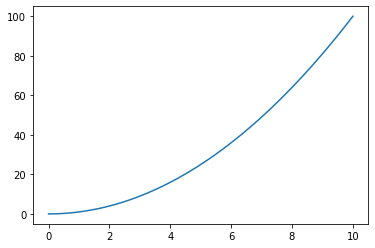

In [3]:
from matplotlib import pyplot as plt
import numpy as np

def my_function(x):
    return x**2

my_x = np.linspace(0, 10)
my_y = my_function(my_x)

plt.plot(my_x, my_y)
plt.show()

### Better code organization

Below, we break the same code up into cells for imports, function definitions, the main code execution, and plotting the result. If anything goes wrong, it is much easier to isolate the section that is broken. As well, if `my_function` takes a long time to run, we can re-run the plotting cell over and over without having to wait.

In [4]:
### imports
from matplotlib import pyplot as plt
import numpy as np

In [5]:
### function definitions
### one function per cell is a good idea
def my_function(x):
    return x**2

In [6]:
### main code execution
my_x = np.linspace(0, 10)
my_y = my_function(my_x)

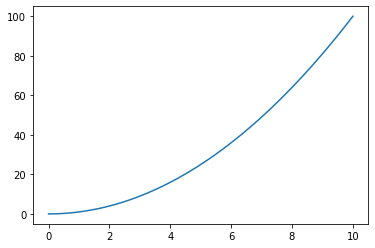

In [7]:
### plotting results
plt.plot(my_x, my_y)
plt.show()

# Activities

## Integer and floating point precision
Not all programming languages have fancy [arbitrary precision integers](https://rushter.com/blog/python-integer-implementation/). NumPy arrays of integers and floats will have limited precision.

#### Integer types
* `np.int8`, `np.int16`, `np.int32`, `np.int64`
* `np.uint8`, `np.uint16`, `np.uint32`, `np.uint64`

#### Floating point types
* `np.float16`, `np.float32`, `np.float64`, `np.float128`

Use the `np.iinfo` (for ints) and `np.finfo` (for floats) commands to see the limitations of some of these variable types, i.e. what do you get from `np.iinfo(np.int32)`?

In [8]:
import numpy as np

See what happens when an upper or lower limit is exceeded. Try a few different types.

In [9]:
x = np.array([125, 126, 127], dtype=np.int64)
print(x)
x += 1
print(x)

[125 126 127]
[126 127 128]


Floating point numbers have limited resolution; they can only store accurately 
certain number of digits.
Try to add different numbers 1E-2, 1E-3, ..., 1E-8 to the array below
and see the effects when the addition stops being exact.
Try to multiply the array below by (1 + x) where x are 1E-5 ,... 1E-8

In [10]:
y = np.array([1000, 100, 10, 1, 0.1], dtype=np.float32)
print (y + 0)
### BEGIN HIDDEN TEST
print (y + 1e-6)
print ("The 1e-6 is preserved for values of 10, 1, and 0.1, but is lost for values 1000 and 100.\n")
print (y * (1 + 1e-6))
print ("The 1e-6 is preserved for all values since we are adding a fixed value relative to the array values.\n")
print (y * (1 + 1e-7))
print ("When we add a relative value less than 1e-7 to the array, there "
       "is a loss of precision and the addition is no longer exact.\n")
### END HIDDEN TEST

[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01]
[1.0000000e+03 1.0000000e+02 1.0000001e+01 1.0000010e+00 1.0000100e-01]
The 1e-6 is preserved for values of 10, 1, and 0.1, but is lost for values 1000 and 100.

[1.0000010e+03 1.0000009e+02 1.0000010e+01 1.0000010e+00 1.0000010e-01]
The 1e-6 is preserved for all values since we are adding a fixed value relative to the array values.

[1.00000012e+03 1.00000015e+02 1.00000010e+01 1.00000012e+00
 1.00000016e-01]
When we add a relative value less than 1e-7 to the array, there is a loss of precision and the addition is no longer exact.



You can learn what is a typical precision you will get by using `np.finfo` function

In [11]:
print(np.finfo('float32'))
print(np.finfo('float64'))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



## NumPy arrays: why bother?
NumPy arrays can be manipulated all at once without having to explicitly iterate over each value. NumPy operations are also significantly faster.

In [12]:
import time

In [13]:
# with lists
t1 = time.time()

z = list(range(10000000))
for i in range(len(z)):
    z[i] += 1

t2 = time.time()
print("That took %f seconds." % (t2-t1))

That took 1.850422 seconds.


In [14]:
# with arrays
t1 = time.time()

za = np.arange(10000000)
za += 1

t2 = time.time()
print("That took %f seconds." % (t2-t1))

That took 0.072553 seconds.


### Some useful NumPy array generator functions.
* `np.arange`
* `np.linspace`
* `np.logspace`
* `np.ones`, `np.ones_like`
* `np.zeros`, `np.zeros_like`
* `np.mgrid`

### Challenge: make the following array in one line:
```
array([1.e-02, 2.e-01, 3.e+00, 4.e+01, 5.e+02])
```

In [15]:
# YOUR CODE HERE
np.array([1.e-2,2.3-1,3.e+0,5.e+2])

array([1.0e-02, 1.3e+00, 3.0e+00, 5.0e+02])

### Challenge 

Make a 2d array of with 10 identical rows [0,1,2,3,4,5,6,7,8,9] using np.mgrid

In [16]:
# YOUR CODE HERE
X,Y = np.mgrid[0:10,0:10];
Y

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

# Numpy Indexing

Here lets look at the basics of numpy indexes. 

Lets start from an numpy array with elements [10, 20,30 , 40 .... 1010] 

Now use the numpy indexing and slicing https://numpy.org/doc/stable/reference/arrays.indexing.html 
to print


* last element of an array
* Every third element starting from the second one 
* Elements from tenth to twentith
* Elements in reverse order
* Every element

Remember in numpy indices start from 0.

In [17]:
# YOUR CODE HERE
A = np.arange(10,1020,10).tolist()
A[-1]
A_third = A[2:-1:3]

You can always index an array with an array of integers to extract specific list of elements

In [18]:
### Main array
x = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6])
### Array of indices
y = np.array([2,3])

print(x[y])

[1.3 1.4]


## Accessing subsets of arrays.
You can use boolean arrays to index numpy arrays.

In [19]:
x = np.arange(10)
y = np.arange(10)**2
z = np.sin(np.arange(10))

print ('the whole z array', z)
print ('the boolean mask', (x+y)<5)
print ('the subset where x+y<5', z[(x+y)<5])

the whole z array [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
the boolean mask [ True  True False False False False False False False False]
the subset where x+y<5 [0.         0.84147098]


# Multi-dimensional arrays 

You can construct them directly using `np.array`, `np.mgrid` or by using 
calculations with one dimensional arrays and broadcasting https://numpy.org/devdocs/user/basics.broadcasting.html

Let's define an array with size of 10 x 20 where i,j-th element is sin(i+2*j)


In [20]:
I,J = np.mgrid[0:10,0:20]
X = np.sin(I + 2*J)
print (X)

[[ 0.          0.90929743 -0.7568025  -0.2794155   0.98935825 -0.54402111
  -0.53657292  0.99060736 -0.28790332 -0.75098725  0.91294525 -0.00885131
  -0.90557836  0.76255845  0.27090579 -0.98803162  0.55142668  0.52908269
  -0.99177885  0.29636858]
 [ 0.84147098  0.14112001 -0.95892427  0.6569866   0.41211849 -0.99999021
   0.42016704  0.65028784 -0.96139749  0.14987721  0.83665564 -0.8462204
  -0.13235175  0.95637593 -0.66363388 -0.40403765  0.99991186 -0.42818267
  -0.64353813  0.96379539]
 [ 0.90929743 -0.7568025  -0.2794155   0.98935825 -0.54402111 -0.53657292
   0.99060736 -0.28790332 -0.75098725  0.91294525 -0.00885131 -0.90557836
   0.76255845  0.27090579 -0.98803162  0.55142668  0.52908269 -0.99177885
   0.29636858  0.74511316]
 [ 0.14112001 -0.95892427  0.6569866   0.41211849 -0.99999021  0.42016704
   0.65028784 -0.96139749  0.14987721  0.83665564 -0.8462204  -0.13235175
   0.95637593 -0.66363388 -0.40403765  0.99991186 -0.42818267 -0.64353813
   0.96379539 -0.15862267]
 [-0.

# Broadcasting

Broadcasting is an important concept where you can do numpy operations
with arrays of different shapes and then numpy will either automatically or 
with some 'guidance' will 'broadcast' smaller arrays to the shape of larger 
array.

#### range is numbers, arange is an array version of range (integers)

Now let's try to construct an array using a broadcasting approach. 

If we want an array of 4x5 where i,j-th element is I^3 * J^2

If we try this 

`
x=np.arange(4)
y=np.arange(5)
x**3 * y**2
`

it will not work because we can't combine arrays of different lengths.


In [21]:
x=np.arange(4)
y=np.arange(5)

However if you use a special syntax to introduce dimensions of size 1, you should be able to do it
I.e. 
`x[:, np.newaxis]` will make an array with the shape (4,1)
while the `y[np.newaxis, : ]` will make an array of shape (1,5) 
after that you should be able to multiply the arrays and that will make a 4x5 array.

In [22]:
print(x[:,np.newaxis]**3 * y[np.newaxis,:]**2)

[[  0   0   0   0   0]
 [  0   1   4   9  16]
 [  0   8  32  72 128]
 [  0  27 108 243 432]]


If we want to change the shape of the array arr, you can use arr.T to transpose it
We can use arr.flatten() to convert an array to 1d 
We can use arr.shape to know the shape of the array

In [23]:
x = np.array([[1,2],[3,4],[5,6]])
print(x)
print('Transposed array', x.T)
print('flattened array into 1d', x.flatten())
print('the shape of the array', x.shape)


[[1 2]
 [3 4]
 [5 6]]
Transposed array [[1 3 5]
 [2 4 6]]
flattened array into 1d [1 2 3 4 5 6]
the shape of the array (3, 2)


We can also combine several arrays into a larger array


In [24]:
x = np.arange(5)
y = np.arange(5)

# this creates 2x5 array
print (np.array([x,y]))
# This creates 1x10 array
print (np.concatenate((x,y)))

[[0 1 2 3 4]
 [0 1 2 3 4]]
[0 1 2 3 4 0 1 2 3 4]


## Basic Plotting
Basic plots can be made using high level commands imported from the `matplotlib.pyplot` module. Some basic plotting commands are given below (assuming the following import `from matplotlib import pyplot as plt`).

Useful plotting commands:
* `plt.plot`
* `plt.semilogx`, `plt.semilogy`
* `plt.loglog`
* `plt.scatter`
* `plt.xlim`, `plt.ylim`
* `plt.xlabel`, `plt.ylabel`
* `plt.legend`
* `plt.title`
* `plt.xscale`, `plt.yscale`
* `plt.show`

Use the `help` function for more information on each.

See [here](https://matplotlib.org/api/pyplot_summary.html) for a list of all plotting commands.

When making plots for checkpoints, always label the axes. Make them look nice.

### Plotting a Gaussian distribution.

A Gaussian distribution with mean, $\mu$, and variance, $\sigma^2$, takes the form:

$
\begin{align}
\Large
f(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\frac{(x - \mu)^2}{2\sigma^{2}}}
\end{align}
$

Make a plot of this function over the range [-5, 5] for a couple values of $\mu$ and $\sigma$ with appropriate labels and a legend. Hint, the `label` keyword can be given to the plotting commands to aid in making the legend. Try different combinations of linear and log-space plots.

In the cell below, write a function that accepts an array of values, `x`, and returns an array representing the Gaussian evaluated for all points in `x`. Note, the text in between the `"""` marks is called a "docstring". See what happens when you do `help(my_gaussian)`.

In [25]:
def my_gaussian(x, mu=0, sigma=1):
    y = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-((x-mu)**2)/(2*sigma**2))
    return y

In [26]:
x = np.linspace(-5,5)

In [27]:
y = my_gaussian(x,mu=0, sigma=1)

### Test your function.

Run the cell below to test your function with a few values.

In [28]:
assert (abs(my_gaussian(0) - 0.3989422804014327) < 1e-7)
assert (abs(my_gaussian(1) - 0.24197072451914337) < 1e-7)

In [29]:
### Some matplotlib imports
from matplotlib import pyplot as plt
%matplotlib inline

### Set some plotting defaults.

The lines below can be used to set some sensible defaults for all of your basic plots. You can put these at the top of a notebook.

In [30]:
plt.rcParams['figure.figsize'] = (10, 6) # inches
plt.rcParams['font.size'] = 14

### Plot the Gaussian distribution.

In the cell below, plot a Gaussian with a `mu=5` and `sigma=2` for the range x = 0 to 10 with at least 100 points.

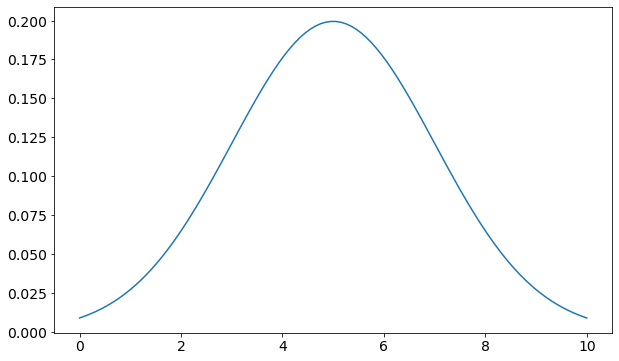

In [31]:
# YOUR CODE HERE
x = np.linspace(0,10,100)
y = my_gaussian(x,mu=5,sigma=2)
plt.plot(x,y)

## Two dimensional plots 
Lets show a two dimensional plot of the z=(x^2+y^2) function 
with color indicating the value of z

This is done with the help of `plt.imshow` function

Lets start by generating gridded data with the help of np.mgrid function

You have to be careful of different conventions whether the first of two axes will be x 
or y!!

In [32]:
# This is now the grid in x from 0 1 and y from 0 to 2 with steps of 0.1
y, x = np.mgrid[0:2:0.1,0:1:.1]

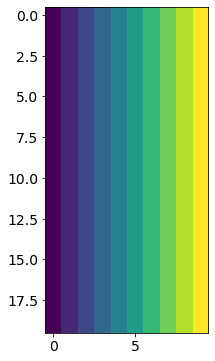

In [33]:
# This is our x
plt.imshow(x)

### Lets add a colour bar

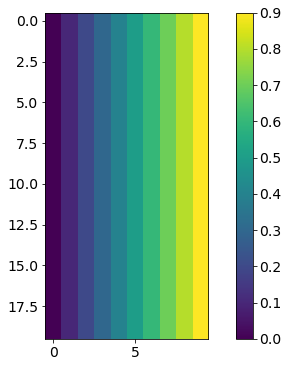

In [34]:
plt.imshow(x)
plt.colorbar()

## useful imshow options

* aspect -- controls the aspect ratio
* origin  can be 'lower' or 'upper' controls where the [0,0] elemnt array will 
be in the lower left or upper left corner
* extent -- control the axis range 

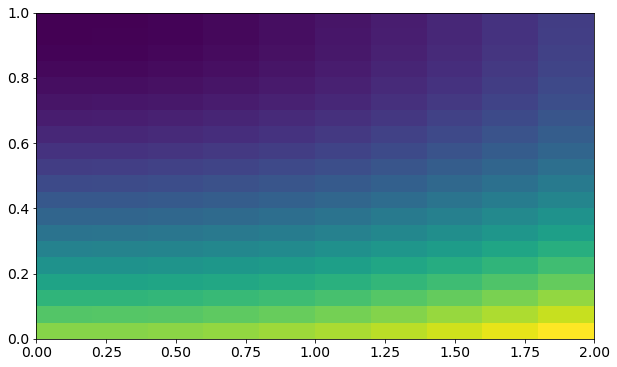

In [35]:
plt.imshow(x**2 + y**2,aspect='auto',extent=(0,2,0,1))

# Interpolation


## Lets implement a simple version of the linear interpolation

We will write a simple function that does linear interpolation from the lecture

For this we will need two functions `np.argsort` that returns indices to sort the array
and `np.searchsorted` that performs fast search in a sorted array

In [36]:
import scipy.interpolate

In [37]:
def lininterp(X, Y, Xnew):
    """
    This function does linear interpolation of Y over X and evaluates on an array xnew
    """
    ind = np.argsort(X)
    # indices to sort the array of Xs
# YOUR CODE HERE
#interpolation formula from lecture notes
    i = np.searchsorted(X,Xnew)
    Ynew = Y[i-1] + (Y[i]-Y[i-1])/(X[i]-X[i-1]) * (Xnew - X[i-1])
    return Ynew

Now let's check our implementation

In [38]:
print ( lininterp(np.arange(10), np.arange(10)*3, np.array([2.5, 9])))

[ 7.5 27. ]


How will the function behave if xnew is outside our interpolation range ? 
Modify the function to return edge values if the input is outside the range
The functions `np.maximum`/`np.minimum` or `np.clip` can be useful 

In [39]:
def lininterp_edge(X,Y, Xnew):
    """
    This function does linear interpolation of Y over X and evaluates on an array xnew
    """
# YOUR CODE HERE
    ind = np.argsort(X)
    Xnew_clip = np.clip(Xnew, min(X), max(X))
    i = np.searchsorted(X,Xnew_clip)
    Ynew = Y[i-1] + (Y[i]-Y[i-1])/(X[i]-X[i-1]) * (Xnew - X[i-1])
    return Ynew

Now let's compare our implementation with the one in python
`scipy.interpolate.interp1d`

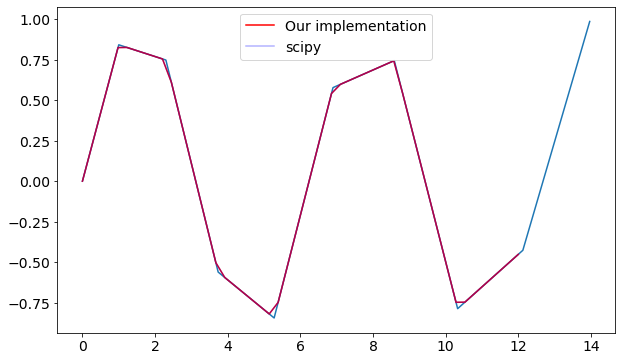

In [40]:
xs = np.arange(10)**1.2
ys = np.sin(xs)
xgrid = np.linspace(0,12)
plt.plot(xs, ys)
plt.plot(xgrid,lininterp_edge(xs,ys,xgrid), 'r', label='Our implementation')
plt.plot(xgrid,scipy.interpolate.interp1d(xs,ys)(xgrid), 'b', label='scipy', alpha=0.3)
plt.legend()

# Spline interpolation
Now Lets look at the at the cubic spline interpolations

Those are implemented in `scipy.interpolate.CubicSpline`, `scipy.interpolate.UnivariateSpline` and others

Lets create a simple Cubic interpolator between two arrays 

[1,2,3,4,5,6,7,8] and [1, sqrt(2), sqrt(3), sqrt(4), sqrt(5), sqrt(6), sqrt(7), sqrt(8)]

In [41]:
x = np.arange(9) + 1
y = np.sqrt(x)
Int = scipy.interpolate.CubicSpline(x, y)

Let's now plot the input data and overplot the spline evaluated on the grid from 1 to 8

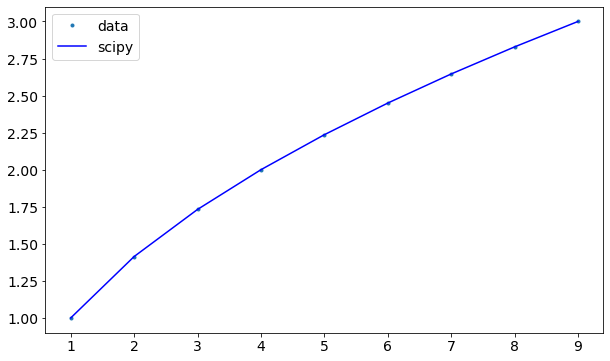

In [42]:
# YOUR CODE HERE
plt.plot(x, y,'.',label = 'data')
plt.plot(x,(Int)(x), 'b', label='scipy')
plt.legend()

Lets compute the derivative of the interpolator using the .derivative method of the interpolator

In [43]:
# YOUR CODE HERE
deriv = Int.derivative(nu=2)
deriv

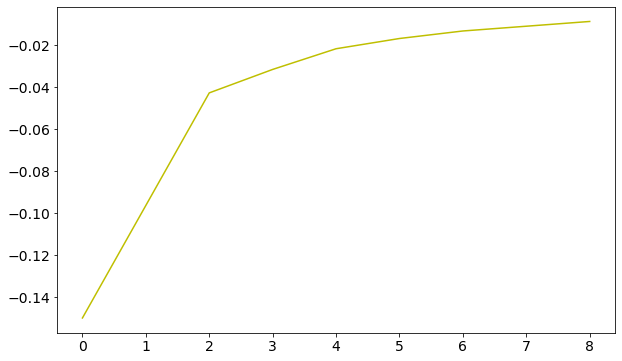

In [44]:
plt.plot((deriv)(x),'y')

# Smoothing splines

Some interpolation methods allow interpolation function that does not go through 
all the data, but instead does additional smoothing.

This can be done with `scipy.interpolate.UnivariateSpline`

Text(0.5, 1.0, 'Data')

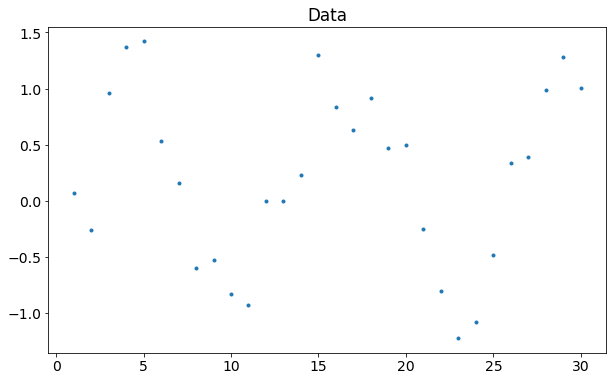

In [45]:
xdat1 = np.r_[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
ydat1 = np.r_[0.07,-0.26,0.96,1.37,1.42,0.53,0.16,-0.60,-0.53,-0.83,-0.93,0.00,-0.00,0.23,
   1.30,0.84,0.63,0.92,0.47,0.50,-0.25,-0.80,-1.22,-1.08,-0.48,0.34,0.39,0.99,1.28,1.01]
plt.plot(xdat1, ydat1, '.')
plt.title('Data')

Now trying smoothing splines with different smoothing parameter

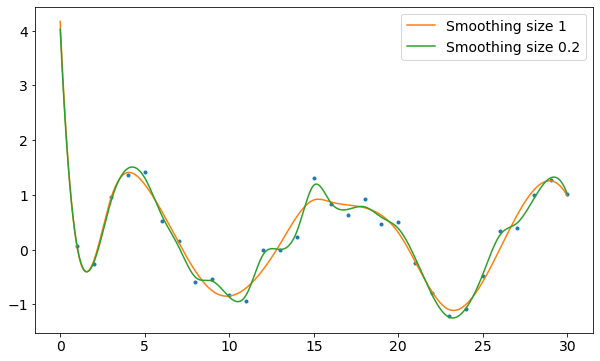

In [46]:
xgrid = np.linspace(0,30,1000)
plt.plot(xdat1, ydat1, '.')
plt.plot(xgrid, scipy.interpolate.UnivariateSpline(xdat1, ydat1,s=1)(xgrid),label='Smoothing size 1')
plt.plot(xgrid, scipy.interpolate.UnivariateSpline(xdat1, ydat1,s=.2)(xgrid),label='Smoothing size 0.2')
plt.legend()

## How can we decide which interpolation is better ? 

We can use the 'cross-validation' method
We can split the data into two (or more) parts 
We can interpolate the over the first part and evaluate the square deviation over the second part.

In [47]:
def evaluate_predictitions_spline(x, y):
    """
    Here we test the predictive abilities of the spline 
    By splitting the data into 3 chunks and returning the 
    total square deviations for a given interpolator
    """
    nsplit = 3 
    N = len(x)
    pos = np.arange(len(x))
    ret = 0 
    for i in range(nsplit):
        testsubset = pos%nsplit ==i 
        fitsubset = ~testsubset 
        curx = x[fitsubset]
        print(fitsubset)
        print(curx)
        cury = y[fitsubset]
        testx = x[testsubset]
        print(testx)
        testy = y[testsubset]
        #interpolate the over the first part
        Int = scipy.interpolate.UnivariateSpline(curx, cury, s=.2)
        #evaluate the square deviation over the second part
        ret = ret + np.sum((Int(testx) - testy)**2)
    return ret


print (evaluate_predictitions_spline(xdat1,ydat1))

[False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True]
[ 2  3  5  6  8  9 11 12 14 15 17 18 20 21 23 24 26 27 29 30]
[ 1  4  7 10 13 16 19 22 25 28]
[ True False  True  True False  True  True False  True  True False  True
  True False  True  True False  True  True False  True  True False  True
  True False  True  True False  True]
[ 1  3  4  6  7  9 10 12 13 15 16 18 19 21 22 24 25 27 28 30]
[ 2  5  8 11 14 17 20 23 26 29]
[ True  True False  True  True False  True  True False  True  True False
  True  True False  True  True False  True  True False  True  True False
  True  True False  True  True False]
[ 1  2  4  5  7  8 10 11 13 14 16 17 19 20 22 23 25 26 28 29]
[ 3  6  9 12 15 18 21 24 27 30]
8.46765889570366


In [48]:
xdata = (0.0,
 0.011437481734488664,
 0.287032703115897,
 1.8288277344191806,
 1.9366957870297075,
 2.7387593197926163,
 3.905478323288236,
 4.995345894608716,
 5.336254511708038,
 8.504421136977792,
 9.233859476879779,
 9.83468338330501,
 10.233442882782583,
 10.322600657764202,
 11.474597295337519,
 13.002857211827767,
 13.747470414623752,
 13.927634725075855,
 14.038693859523377,
 14.672857490581015,
 14.675589081711305,
 16.53541971169328,
 16.98304195645689,
 18.62602113776709,
 19.81014890848788,
 20.445224973151742,
 21.162811600005902,
 23.70269802430277,
 26.554665937222623,
 26.99278917650261,
 28.044399206440517,
 28.777533858634875,
 29.36141483736795,
 30.233257263183976,
 31.342417815924286,
 31.551563100606295,
 34.556072704304775,
 34.776585974550656,
 34.88983419778425,
 39.67674742306699,
 39.767683698553355,
 40.81368027612812,
 41.40559878195683,
 41.417926952690266,
 41.7022004702574,
 41.730480236712694,
 41.91945144032948,
 42.11076250050522,
 42.809118987129494,
 44.78935261759052,
 44.991213347994055,
 49.15731592803383,
 51.48891120583086,
 53.316528497301704,
 53.58964059155116,
 53.88167340033569,
 55.868982844575164,
 57.36794866722859,
 57.411760549201304,
 57.83896143871318,
 58.65550405019929,
 58.93055369032842,
 61.71449136207239,
 62.16957202091218,
 62.36722070556089,
 66.3441497818448,
 66.37946452197887,
 67.04675101784022,
 67.8835532939891,
 68.52195003967594,
 68.65009276815837,
 69.18771139504733,
 69.23226156693141,
 69.44001577277452,
 69.97583600209312,
 72.0324493442158,
 72.59979853504515,
 74.81656543798394,
 75.01443149449675,
 75.08121031361556,
 75.09424340273372,
 78.92793284514885,
 80.07445686755366,
 80.73912887095238,
 83.46256718973729,
 87.63891522960382,
 87.81174363909454,
 87.8142503429413,
 88.33060912058099,
 89.46066635038473,
 89.58862181960669,
 90.33795205622538,
 90.34019152878835,
 90.85955030930955,
 92.75085803960339,
 94.45947559908133,
 94.94892587070713,
 95.7889530150502,
 96.48400471483856,
 96.82615757193975,
 98.88610889064947,
 100.0)

In [49]:
print (evaluate_predictitions_spline(xdata,ydat1))

TypeError: only integer scalar arrays can be converted to a scalar index

In [56]:
def evaluate_predictitions_spline(x, y):
    """
    Here we test the predictive abilities of the spline 
    By splitting the data into 3 chunks and returning the 
    total square deviations for a given interpolator
    """
    nsplit = 3 
    N = len(x)
    pos = np.arange(len(x))
    ret = 0 
    for i in range(nsplit):
        testsubset = pos%nsplit ==i 
        fitsubset = ~testsubset 
        curx = x[fitsubset]
        print(fitsubset)
        cury = y[fitsubset]
        testx = x[testsubset]
        testy = y[testsubset]
        #interpolate the over the first part
        Int = scipy.interpolate.CubicSpline(curx, cury)
        #evaluate the square deviation over the second part
        ret = ret + np.sum((Int(testx) - testy)**2)
        print(ret)
    return ret


print (evaluate_predictitions_spline(xdat1,ydat1))

[False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True]
4.5244589429671676
[ True False  True  True False  True  True False  True  True False  True
  True False  True  True False  True  True False  True  True False  True
  True False  True  True False  True]
6.004554791063466
[ True  True False  True  True False  True  True False  True  True False
  True  True False  True  True False  True  True False  True  True False
  True  True False  True  True False]
8.570956295874117
8.570956295874117


In [ ]:
def evaluate_predictitions_spline(x, y):
    """
    Here we test the predictive abilities of the spline 
    By splitting the data into 3 chunks and returning the 
    total square deviations for a given interpolator
    """
    nsplit = 3 
    N = len(x)
    pos = np.arange(len(x))
    ret = 0 
    for i in range(nsplit):
        testsubset = pos%nsplit ==i 
        fitsubset = ~testsubset 
        curx = x[fitsubset]
        cury = y[fitsubset]
        testx = x[testsubset]
        testy = y[testsubset]
        #interpolate the over the first part
        Int = scipy.interpolate.interp1d(curx,cury,bounds_error=False,fill_value=-1)
        #evaluate the square deviation over the second part
        ret = ret + np.sum((Int(testx) - testy)**2)
    return ret


print (evaluate_predictitions_spline(xdat1,ydat1))

# Multivariate Interpolation

Here we explore multi-variate interpolation.

Importantly the interpolator classes accept two arguments, one is an array of  N-dimensional coordinates and another is 1-D array of values.

For example 

`scipy.interpolate.LinearNDInterpolator(np.array([[1,3],[3,4],[1,2],[5,6]]), [13,14,15,16])`

When passing input arrays to these interpolators you may need to reshape them 

For this test we define input data as an array defined on a grid of step 1 from 0 to 9 in x and y 
and `z = sin(x+y)`

We then show the results of interpolation of z on a grid with the step of 0.1
`scipy.interpolate.LinearNDInterpolator` and `scipy.interpolate.NearestNDInterpolator` and 
`scipy.interpolate.RbfInterpolator`

In [ ]:
x,y = np.mgrid[:10,:10]
z = np.sin(x+y)
xgrid, ygrid = np.mgrid[:10:.1,:10:.1]

plt.imshow(
    scipy.interpolate.LinearNDInterpolator(np.array([x.flatten(),y.flatten()]).T,
                                                  z.flatten())(xgrid,ygrid))


# Challenge
Now show the interpolation using NearestNDInterpolator

In [ ]:
x,y = np.mgrid[:10,:10]
z = np.sin(x+y)
xgrid, ygrid = np.mgrid[:10:.1,:10:.1]# 2D grid for interpolation
interp = scipy.interpolate.NearestNDInterpolator(list(zip(x.flatten(),y.flatten())), z.flatten())
Z = interp(xgrid, ygrid)
plt.pcolormesh(xgrid, ygrid, Z, shading='auto')
plt.plot(x, y, "ok", label="input point")
plt.colorbar()
plt.axis("equal")
plt.show()

# Challenge

Now show the interpolation using Radial basis function interpolator RBFInterpolator

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### You made it!

Congratulations! Make sure to submit your notebook to get credit and don't forget to clear the output first.